In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

## Preparing dataset

In [2]:
data1 = datasets.make_blobs()
data2 = datasets.make_circles()
data3 = datasets.make_moons()


In [101]:
X, Y = data1
X.shape

(100, 2)

In [4]:
X[:,1].shape

(100,)

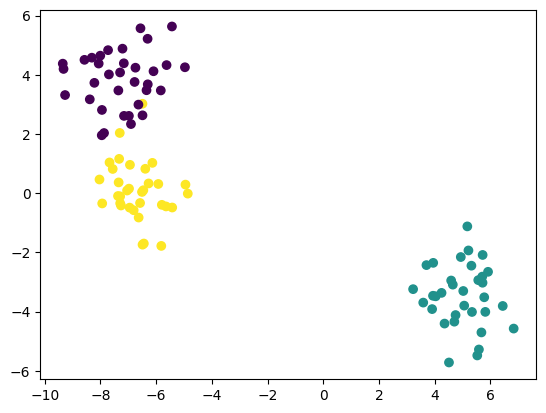

In [5]:
plt.scatter(X[:,0], X[:,1], c=Y)

## Coding K-NN algorithm : Classification

In [181]:
def euclidean(A, B):
    A2 = (A**2).sum(axis=1).reshape(1,-1)
    B2 = (B**2).sum(axis=1).reshape(-1,1)
    #print(A2.shape, B2.shape)
    prod = B @ A.T
    SUM = A2 + B2 - 2 * prod
    #print(SUM.shape)
    return np.sqrt(SUM)
    return -2 * B@A.T + np.sum(A**2,axis=1) + np.sum(B**2,axis=1)[:, np.newaxis]
    

debug1 = None
debug2 = None
def knn(train, test, k, distance):
    global debug1, debug2
    X_train, Y_train = train
    X_test = test
    #print("DATA SHAPE ", X_train.shape, Y_train.shape, X_test.shape)
    distances = distance(X_train, X_test)
    debug=distances
    #print("Distances", distances.shape
    #     )
    sorted_distances_idx = np.argsort(distances, axis=1)
    
    #print(sorted_distances_idx.shape)
    top_k = sorted_distances_idx[:,:k]
#     debug1 = top_k
#     print(top_k)
#     print("Y_train", Y_train.shape)
#     print("TOP_k ", top_k.shape)
    debug2 = Y_train
    neighbours = Y_train[top_k]
    debug2 = neighbours
    #debug = top_k
    classification = stats.mode(neighbours, axis=1)
    #debug = classification
    return classification[0]

    

In [182]:
test_data = np.array([[-2,-6],[5,8], [10,5]])
Y_pred = knn(data1, test_data , 4, euclidean)
Y_pred

/var/folders/6v/9gb458t90k7dvc1hvl02dr4w0000gn/T/ipykernel_3680/2915416154.py:35: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  classification = stats.mode(neighbours, axis=1)


array([[1],
       [1],
       [1]])

## Plotting the decision boundary

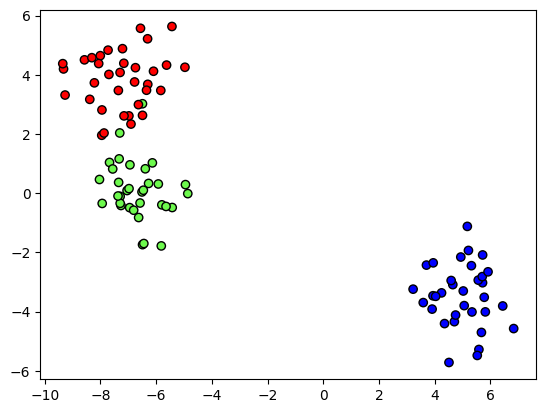

In [183]:
from matplotlib.colors import ListedColormap

x_min, x_max = -15, 15
y_min, y_max = -15, 15

xx = np.arange(x_min, x_max, 0.1)
yy = np.arange(y_min, y_max, 0.1)

xx, yy = np.meshgrid(xx, yy)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape(len(r1), 1), r2.reshape(len(r2), 1)
grid = np.hstack((r1, r2))

X_train, y_train = data1
ax = plt.subplot(1, 1, 1)
cm_bright = ListedColormap(["#FF0000", "#0000FF", '#6df94d'])
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")



0 3


/var/folders/6v/9gb458t90k7dvc1hvl02dr4w0000gn/T/ipykernel_3680/2915416154.py:35: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  classification = stats.mode(neighbours, axis=1)


(134, 182) (134, 182) (134, 182)
1 11


/var/folders/6v/9gb458t90k7dvc1hvl02dr4w0000gn/T/ipykernel_3680/1713476324.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[d_no][i].scatter(X_train[row_ix[0], 0], X_train[row_ix[0], 1], cmap=cm_bright)


(134, 182) (134, 182) (134, 182)
2 17
(134, 182) (134, 182) (134, 182)
3 51
(134, 182) (134, 182) (134, 182)
0 3
(40, 40) (40, 40) (40, 40)
1 11
(40, 40) (40, 40) (40, 40)
2 17
(40, 40) (40, 40) (40, 40)
3 51
(40, 40) (40, 40) (40, 40)
0 3
(35, 50) (35, 50) (35, 50)
1 11
(35, 50) (35, 50) (35, 50)
2 17
(35, 50) (35, 50) (35, 50)
3 51
(35, 50) (35, 50) (35, 50)


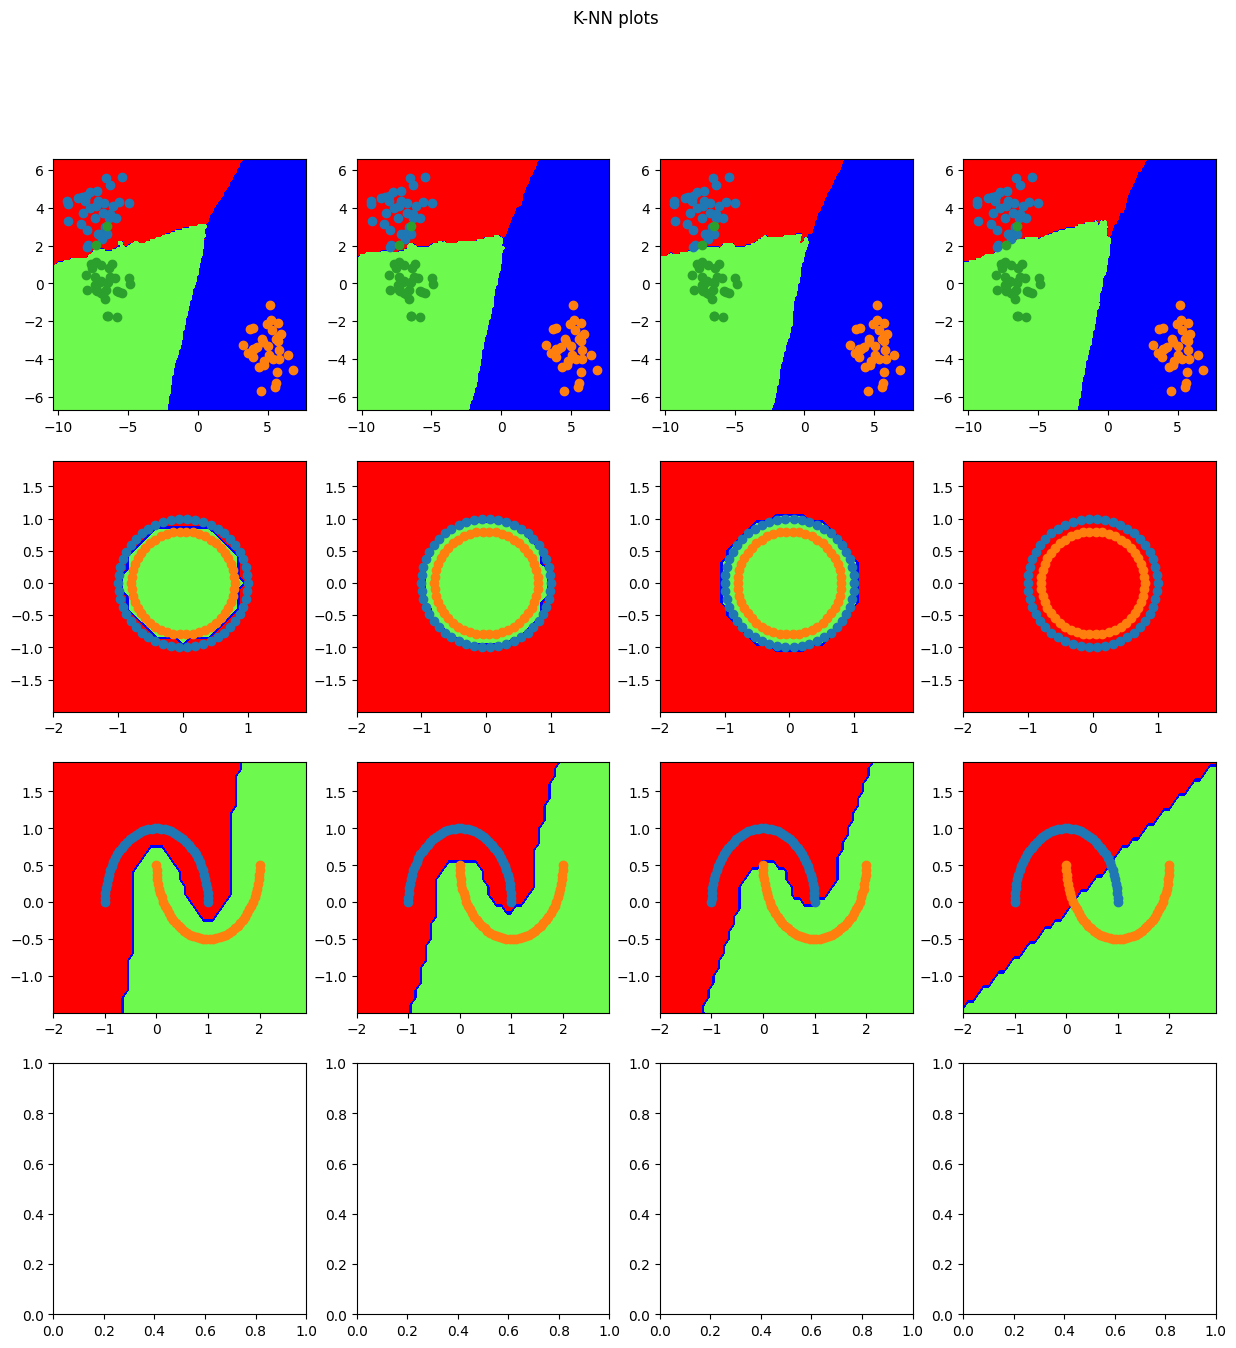

In [184]:
ks = [3, 11, 17, 51]
datasets = [data1, data2, data3]

fig, axs = plt.subplots(4,4, figsize=(15,15))
fig.suptitle('K-NN plots')
for d_no, dataset in enumerate(datasets):
    
    X_train, y_train = dataset
    for i,k in enumerate(ks):
        print(i,k)
        #ax = plt.subplot(4, 4, i+1, figsize=(5,5))
        
        
        
        x_min, x_max = min(X_train[:,0]) - 1, max(X_train[:,0]) + 1
        y_min, y_max = min(X_train[:,1]) - 1, max(X_train[:,1]) + 1

        xx = np.arange(x_min, x_max, 0.1)
        yy = np.arange(y_min, y_max, 0.1)

        xx, yy = np.meshgrid(xx, yy)
        r1, r2 = xx.flatten(), yy.flatten()
        r1, r2 = r1.reshape(len(r1), 1), r2.reshape(len(r2), 1)
        grid = np.hstack((r1, r2))
        zz = knn(train=dataset, test=grid, k=k, distance=euclidean).reshape(xx.shape)
        print(xx.shape, yy.shape, zz.shape)
        axs[d_no][i].contourf(xx, yy, zz, cmap=cm_bright)
    
        for class_value in range(3):
            # get row indexes for samples with this class
            row_ix = np.where(y_train == class_value)

            # create scatter of these samples
            axs[d_no][i].scatter(X_train[row_ix[0], 0], X_train[row_ix[0], 1], cmap=cm_bright)

In [169]:
zz

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

In [ ]:
debug2.shape

In [67]:
debug

array([[22.9916335 , 28.07665797, 11.10051382, ..., 30.84697713,
        21.99999015, 28.9732206 ],
       [22.96150847, 28.00329548, 11.04574909, ..., 30.77719478,
        21.96827445, 28.90735262],
       [22.93177995, 27.93009833, 10.9916213 , ..., 30.70757949,
        21.93696874, 28.84168094],
       ...,
       [24.09210399, 14.14399829, 31.33845563, ..., 11.30100655,
        24.41702696, 13.34571674],
       [24.18646595, 14.2083962 , 31.41378626, ..., 11.37332269,
        24.50993107, 13.42518822],
       [24.28087304, 14.27320418, 31.48925425, ..., 11.44605561,
        24.60289082, 13.50493253]])

In [40]:
debug2[debug1]

IndexError: index 65770 is out of bounds for axis 0 with size 100

In [43]:
debug1

array([[65770, 57506, 27961, 69957, 66687, 63792, 63209, 62608, 60985,
        62587, 63505, 65168, 65477, 23461, 24665, 63096, 64121, 69676,
        64118, 34551, 71188, 59177, 32167, 68910, 37570, 64704, 63209,
        69659, 66092, 66382, 29775, 60491, 63367, 33673, 27048, 70286,
        63392, 69531, 67559, 69196, 57968, 63973, 63493, 35149, 63056,
        30361, 64881, 64089, 73891, 29475, 27373, 34560, 66673, 67569,
        66678, 65928, 31560, 32183, 30678, 63801, 67287, 65007, 34252,
        66800, 28875, 32774, 34264, 63373, 31868, 26777, 70106, 31556,
        66799, 63503, 70261, 28855, 28879, 62900, 33683, 30696, 34881,
        60494, 66213, 69077, 64298, 64277, 32160, 30951, 64715, 30657,
        64406, 63800, 60811, 32150, 64875, 61408, 31576, 66516, 62470,
        65591],
       [65769, 57206, 27661, 69956, 66387, 64092, 62909, 62308, 60984,
        62588, 63504, 64868, 65476, 23460, 24965, 63097, 64421, 69976,
        64418, 34552, 70888, 59176, 31867, 68909, 37569, 6500

In [23]:
np.unique(zz)

array([0])

In [54]:
grid.shape

(90000, 2)

In [92]:
data1[1].shape

(100,)